[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/azad-academy/MLBasics-ANN/blob/main/ml-ann.ipynb)

# Artificial Neural Networks
#### Author : J. Rafid Siddiqui (jrs@azaditech.com)


## Pre-requisites and Imports

In [ ]:
!pip install scikit-learn
!pip install ipympl

In [ ]:
!git clone https://www.github.com/azad-academy/MLBasics-ANN

In [1]:
import sklearn
from sklearn.datasets import *
from sklearn.model_selection import train_test_split

import sys
%matplotlib widget
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import math
import matplotlib
from ann import *
from ann2 import *

from ipywidgets import *
from IPython.display import display, clear_output, Image, HTML

import scipy.optimize as optimizer

# Demo of the Forward/Back Propagation

Box(children=(VBox(children=(FloatSlider(value=0.5, max=4.0, min=-4.0, step=0.01), FloatSlider(value=0.5, max=…

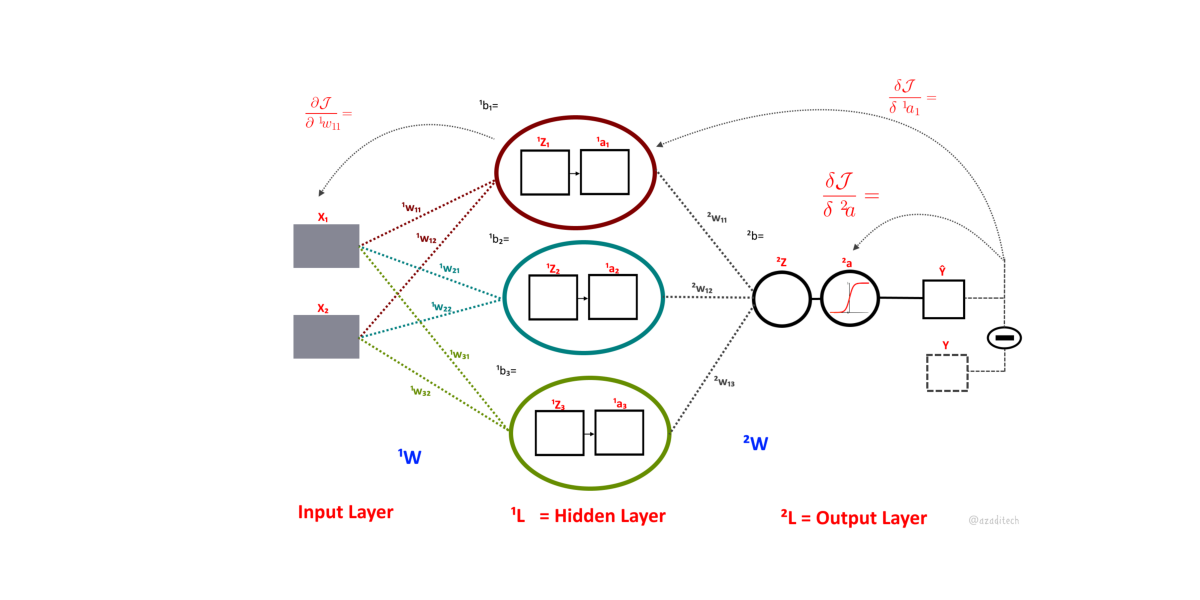

In [2]:
display(form)        # Displaying the controls

show_network()


# Data Preparation

In [3]:
rstate = np.random.RandomState(1)
data = sklearn.datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,random_state=rstate)
X = data[0]
Y = data[1]

#Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

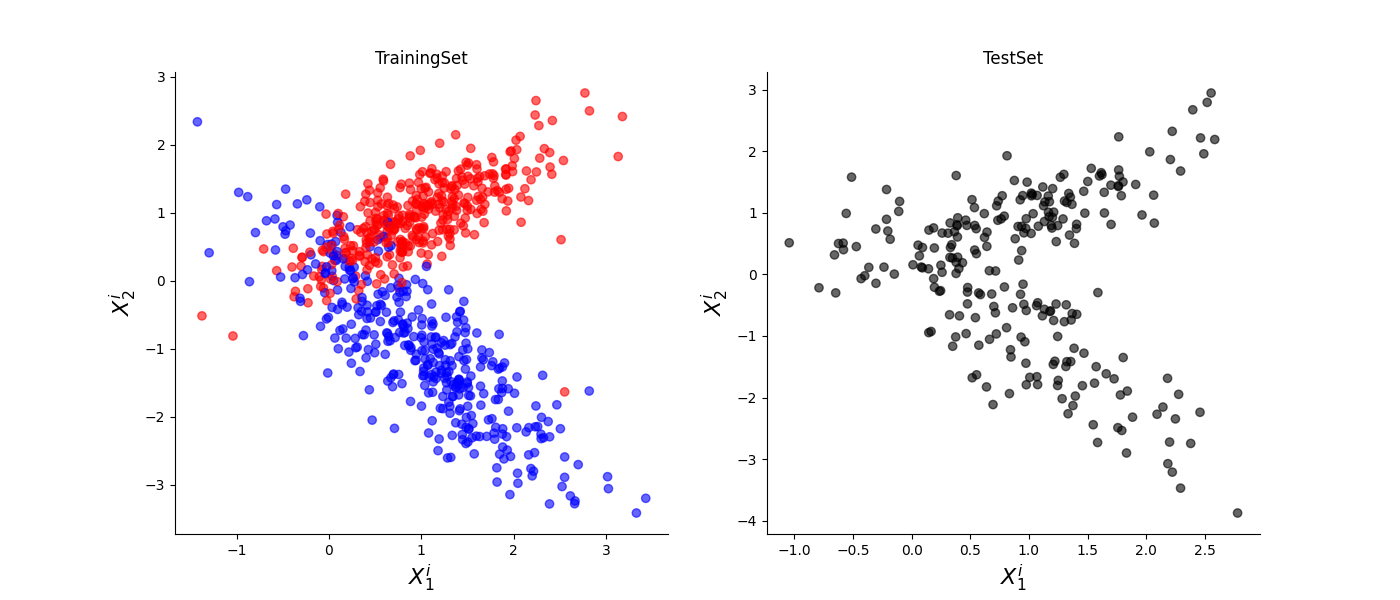

In [4]:
data_fig,axes = plt.subplots(1,2,figsize=(14,6))
plot_data(X_train,Y_train,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['r','b'],plt_title="TrainingSet",canvas=axes[0])
plot_data(X_test,np.zeros((len(X_test),),dtype=int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k'],plt_title="TestSet",canvas=axes[1])

# Training

In [5]:
X_h = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
Y_h = np.array([Y_train]).T

In [6]:
ann = ANN()
ann.inputs = X_h
ann.Y = Y_h
L = .05
P = optimizer.minimize(fun=ann.cost,x0=ann.params,method='CG',jac=ann.Gradient,args=(L))

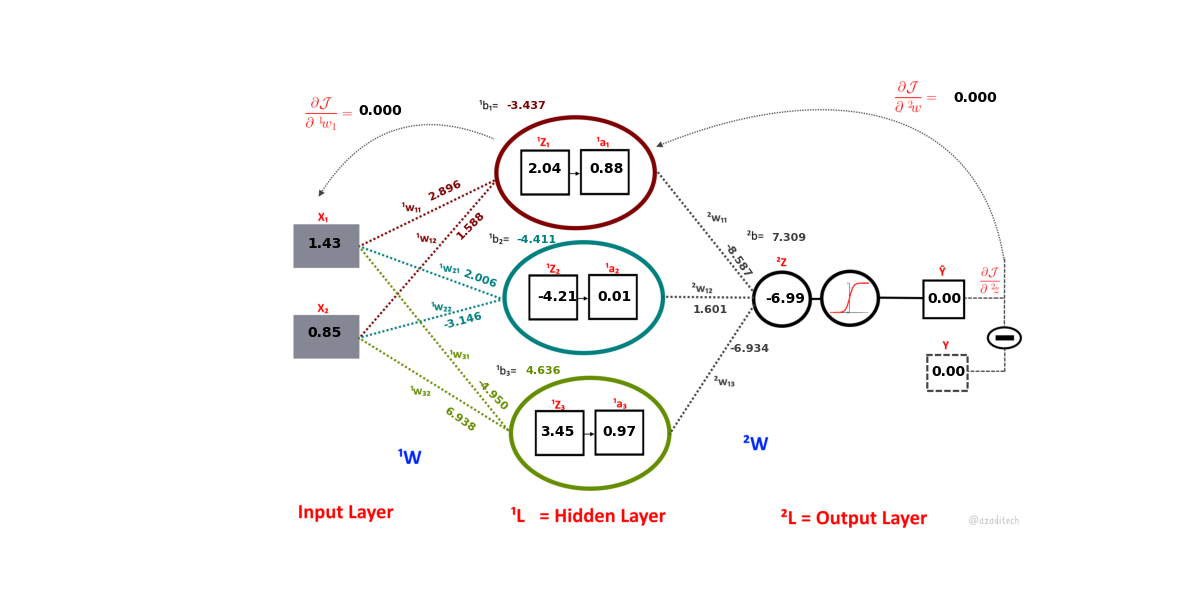

In [7]:
show_network()
initialize_params(ann.params)
ann.params = P.x

idx = 130
ann.Y = np.array([Y_h[idx,:]])
x = np.array([X_h[idx,:]])
y =ann.predict(x)
update_params(ann.params)


# Testing

In [39]:
X_h = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
Y_h = np.array([Y_test]).T
#X = X_h[:,1:]
y_hat=ann.predict(X_h)

In [40]:
y_hat = y_hat>0.7   # Applying thershold to get class labels

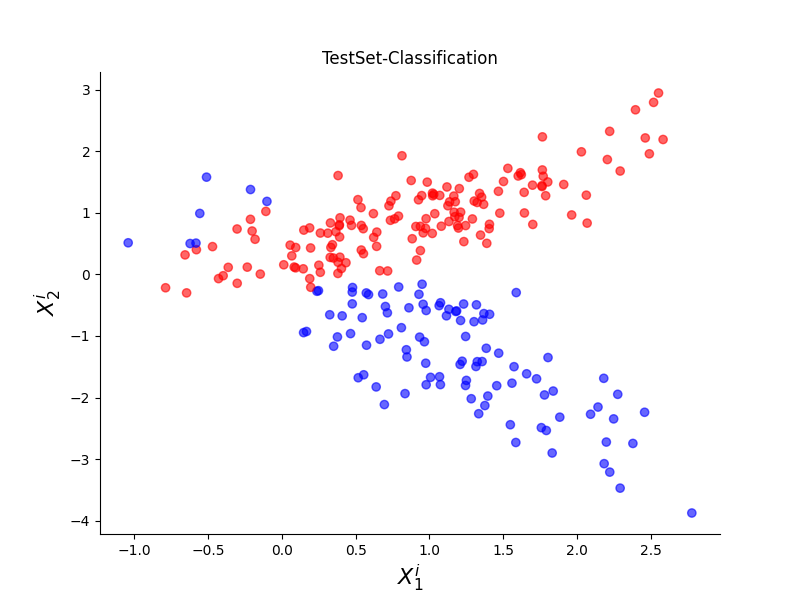

In [41]:
lfig,ax = plt.subplots(figsize=(8,6))
plot_data(X_test,1*y_hat,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['r','b'],plt_title="TestSet-Classification",canvas=ax)

# Larger Network for Non-Linear Data
<img src="ANN-diagram.png" width="720">

In [44]:
#Generating Non-Linear Data
rstate = np.random.RandomState(10)
X2, Y2 = sklearn.datasets.make_moons(n_samples=1000,noise=0.1,random_state=rstate)

#Splitting the data into train and test sets
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=10)
X_h2 = np.concatenate((np.ones((X_train2.shape[0],1)),X_train2),axis=1)
Y_h2 = np.array([Y_train2]).T

X_h2_test = np.concatenate((np.ones((X_test2.shape[0],1)),X_test2),axis=1)
Y_h2_test = np.array([Y_test2]).T

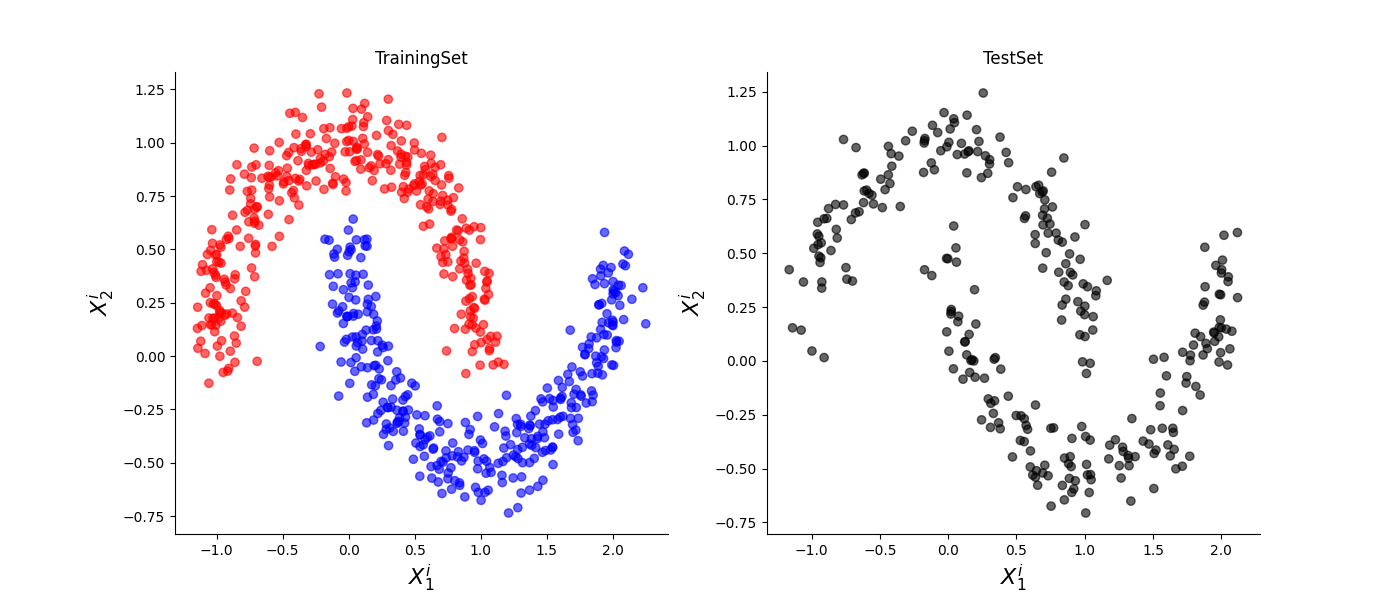

In [45]:
data_fig2,axes = plt.subplots(1,2,figsize=(14,6))
plot_data(X_train2,Y_train2,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['r','b'],plt_title="TrainingSet",canvas=axes[0])
plot_data(X_test2,np.zeros((len(X_test2),),dtype=int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k'],plt_title="TestSet",canvas=axes[1])

In [20]:
# Running the Optimizer on a Network with 2-Hidden layers
ann2 = ANN2()
ann2.inputs = X_h2
ann2.Y = Y_h2
L = 0.06
P = optimizer.minimize(fun=ann2.cost,x0=ann2.params,method='CG',jac=ann2.Gradient,args=(L))

In [21]:
y_hat2=ann2.predict(X_h2_test) # Predicting the Testset
y_hat2 = y_hat2>0.7   # Applying thershold to get class labels

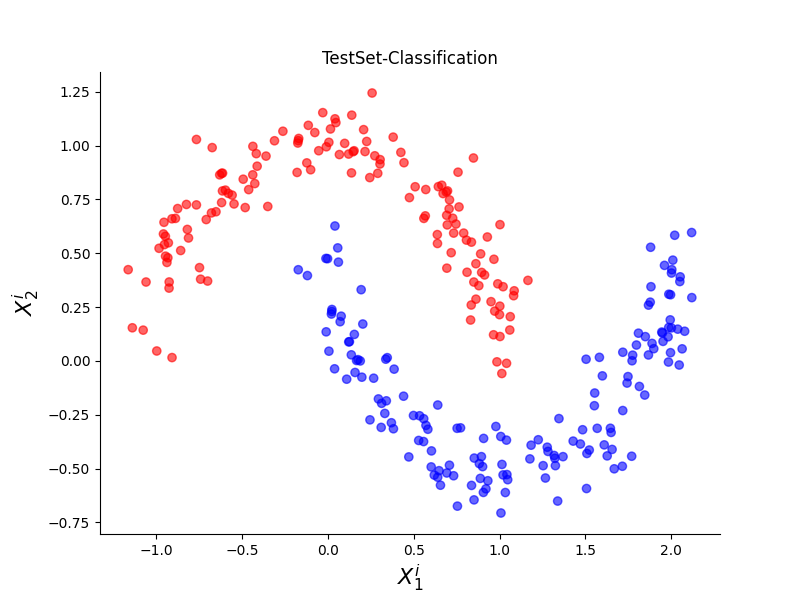

In [46]:
nlcfig,ax = plt.subplots(figsize=(8,6))
plot_data(X_test2,1*y_hat2,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['r','b'],plt_title="TestSet-Classification",canvas=ax)
